# DIABETIC RETINOPATHY PREDICTION IN PATIENTS


##### Predicting Diabetic Retinopathy Disease based on 
###### 1. ID -  Unique Identifier
###### 2. Age - Patient Age
###### 3. Systolic Blood Pressure - ideal(<120mmHg) when value exceeds more than 120mmHg - damages arteries faster
###### 4. Diastolic Blood Pressure -ideal (<80mmHg) when value gets more than 80mmHg - indicates artery stiffness.
###### 5. Cholestrol Levels - ideal (125 -200 mg/dl) 
###### 6. Prognosis - Target Value (1 = Diabetic_Retinopathy, 0 = No_Diabetic Retinopathy)





### Exploratory Data Analysis(EDA) :

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
#import pandas_profiling as pp
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot

### The data 
Let's start by reading in the pronostico_dataset (1).csv file into a pandas dataframe.

In [2]:
#Load the data
data= pd.read_csv("pronostico_dataset (1).csv")
data

,ID;age;systolic_bp;diastolic_bp;cholesterol;prognosis
0,0;77.196339508802097;85.288742418610894;80.021...
1,1;63.5298502234171;99.379735822841894;84.85236...
2,2;69.003986220296298;111.349455002811;109.8506...
3,3;82.638209813584396;95.056127546033593;79.666...
4,4;78.346285672257494;109.154590823354;90.71322...
...,...
5995,5995;49.611850239536302;94.857639409400207;86....
5996,5996;63.099686031701999;100.039527119618;93.51...
5997,5997;55.562242769599898;98.421446235450603;102...
5998,5998;63.468956315401201;106.809288900789;88.06...


In [3]:
#Delimiter is a character that separates values or splits strings

data = pd.read_csv("pronostico_dataset (1).csv", delimiter=';')        

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            6000 non-null   int64  
 1   age           6000 non-null   float64
 2   systolic_bp   6000 non-null   float64
 3   diastolic_bp  6000 non-null   float64
 4   cholesterol   6000 non-null   float64
 5   prognosis     6000 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 281.4+ KB


In [5]:
data.head()

,ID,age,systolic_bp,diastolic_bp,cholesterol,prognosis
0,0,77.196340,85.288742,80.021878,79.957109,retinopathy
1,1,63.529850,99.379736,84.852361,110.382411,retinopathy
2,2,69.003986,111.349455,109.850616,100.828246,retinopathy
3,3,82.638210,95.056128,79.666851,87.066303,retinopathy
4,4,78.346286,109.154591,90.713220,92.511770,retinopathy


In [6]:
data.tail()

,ID,age,systolic_bp,diastolic_bp,cholesterol,prognosis
5995,5995,49.611850,94.857639,86.615671,107.643986,no_retinopathy
5996,5996,63.099686,100.039527,93.515186,104.971404,retinopathy
5997,5997,55.562243,98.421446,102.697875,120.875951,retinopathy
5998,5998,63.468956,106.809289,88.060631,106.052213,retinopathy
5999,5999,62.506825,96.900784,86.878033,108.625436,no_retinopathy


In [7]:
data[0:11]

,ID,age,systolic_bp,diastolic_bp,cholesterol,prognosis
0,0,77.196340,85.288742,80.021878,79.957109,retinopathy
1,1,63.529850,99.379736,84.852361,110.382411,retinopathy
2,2,69.003986,111.349455,109.850616,100.828246,retinopathy
3,3,82.638210,95.056128,79.666851,87.066303,retinopathy
4,4,78.346286,109.154591,90.713220,92.511770,retinopathy
5,5,52.181782,121.080264,110.488129,115.468279,retinopathy
6,6,68.722144,115.232290,92.730813,106.784960,retinopathy
7,7,58.716578,98.653683,94.172130,100.829654,retinopathy
8,8,59.121758,102.681371,96.991612,106.331045,retinopathy
9,9,63.624683,96.341053,80.919213,121.558605,retinopathy


### Data Cleaning

Data Cleaning improves the quality of analysis by reducing errors, missing values, and inconsistencies.

In [8]:
data.isnull()

,ID,age,systolic_bp,diastolic_bp,cholesterol,prognosis
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
5995,False,False,False,False,False,False
5996,False,False,False,False,False,False
5997,False,False,False,False,False,False
5998,False,False,False,False,False,False


In [9]:
data.isnull().sum()              

ID              0
age             0
systolic_bp     0
diastolic_bp    0
cholesterol     0
prognosis       0
dtype: int64

In [10]:
data[data.duplicated()]                    #find duplicate rows

,ID,age,systolic_bp,diastolic_bp,cholesterol,prognosis


In [11]:
print(data.duplicated().sum())            # Count of duplicate rows

0


In [12]:
data.describe()

,ID,age,systolic_bp,diastolic_bp,cholesterol
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,2999.500000,60.464121,100.694822,90.505547,100.628255
std,1732.195139,8.564392,10.669267,9.648200,10.433915
min,0.000000,35.164761,69.675429,62.807105,69.967453
25%,1499.750000,54.371941,93.267420,83.641788,93.202373
50%,2999.500000,59.831159,100.119926,89.912429,100.060637
75%,4499.250000,65.809652,107.439501,96.682405,107.250829
max,5999.000000,103.279497,151.699660,133.456382,148.233544


### Data Visualizations
Data visualization transforms complex data into accessible visual formats, enabling better understanding, decision-making, and communication across various fields.

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

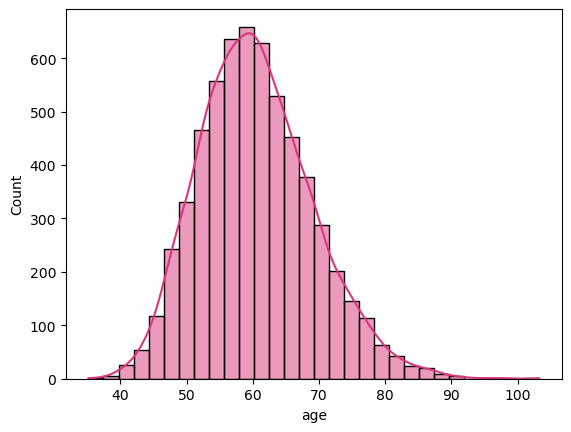

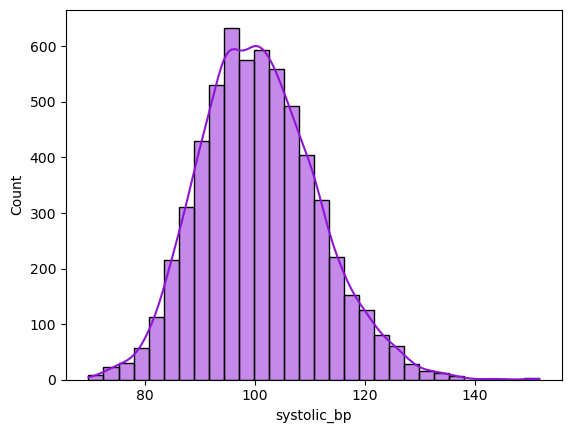

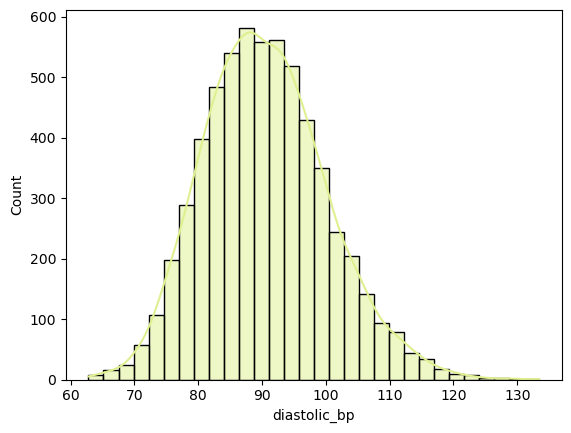

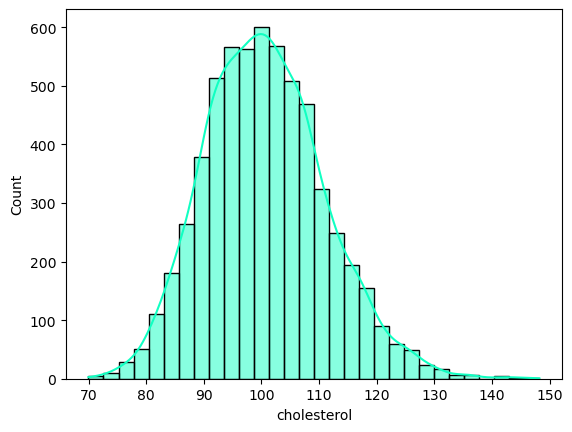

In [14]:
# Let's remove ID and prognosis columns temporarily
import random

data_temp = data.drop(columns=['ID', 'prognosis'])
for feature in data_temp:
  random_color = (random.random(), random.random(), random.random())
  sns.histplot(data[feature], kde=True, bins=30, color=random_color)
  plt.show()

#### The above figures look like normal distribution with right skewness

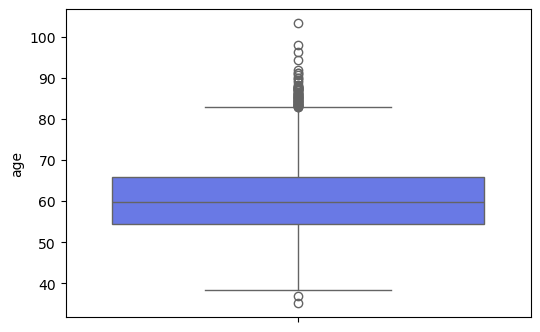

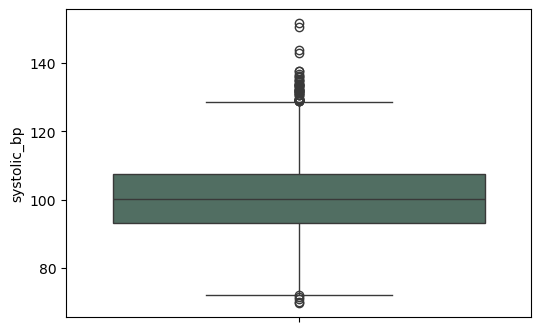

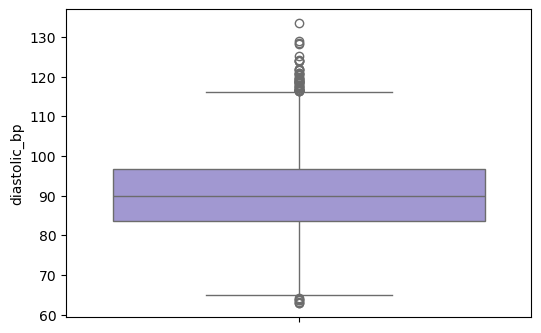

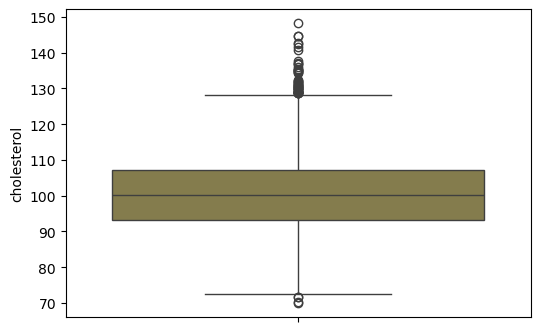

In [15]:
# For skewness and outliers let's boxplot
for feature in data_temp:
  figure = plt.figure(figsize=(6,4))
  random_color = (random.random(), random.random(), random.random())
  sns.boxplot(data_temp[feature],color=random_color)
  plt.show()

#### From the above figures we can detect the outliers

In [16]:
# let's remove those outliers
for feature in data_temp:
  Q1 = data[feature].quantile(0.25)
  Q3 = data[feature].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  data_cleaned = data[(data[feature] >= lower_bound) & (data[feature] <= upper_bound)]

In [17]:
data_cleaned

,ID,age,systolic_bp,diastolic_bp,cholesterol,prognosis
0,0,77.196340,85.288742,80.021878,79.957109,retinopathy
1,1,63.529850,99.379736,84.852361,110.382411,retinopathy
2,2,69.003986,111.349455,109.850616,100.828246,retinopathy
3,3,82.638210,95.056128,79.666851,87.066303,retinopathy
4,4,78.346286,109.154591,90.713220,92.511770,retinopathy
...,...,...,...,...,...,...
5995,5995,49.611850,94.857639,86.615671,107.643986,no_retinopathy
5996,5996,63.099686,100.039527,93.515186,104.971404,retinopathy
5997,5997,55.562243,98.421446,102.697875,120.875951,retinopathy
5998,5998,63.468956,106.809289,88.060631,106.052213,retinopathy


##### We removed the values outside these bounds and stored

In [18]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5946 entries, 0 to 5999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            5946 non-null   int64  
 1   age           5946 non-null   float64
 2   systolic_bp   5946 non-null   float64
 3   diastolic_bp  5946 non-null   float64
 4   cholesterol   5946 non-null   float64
 5   prognosis     5946 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 325.2+ KB


In [19]:
data_cleaned.shape

(5946, 6)

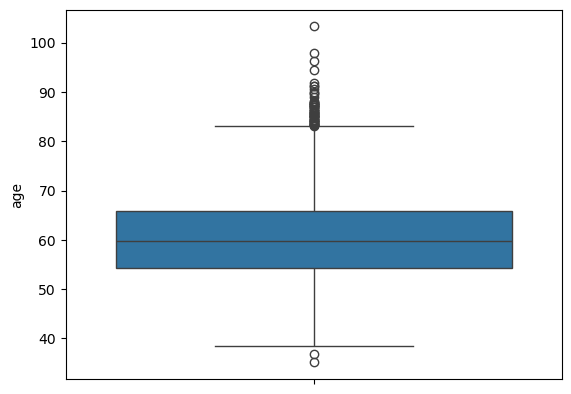

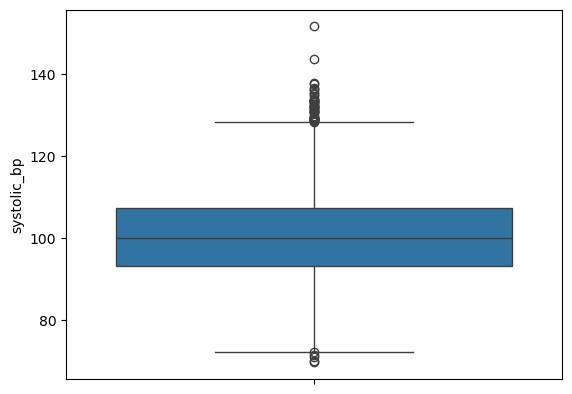

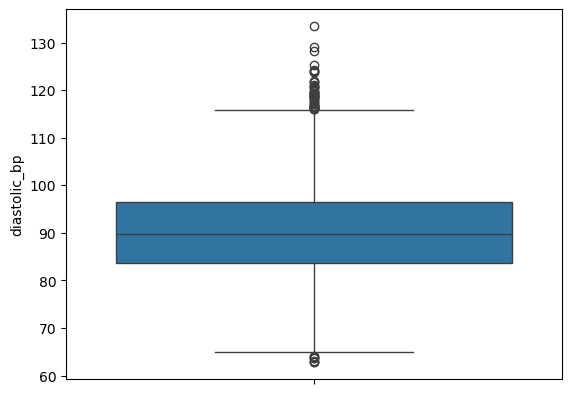

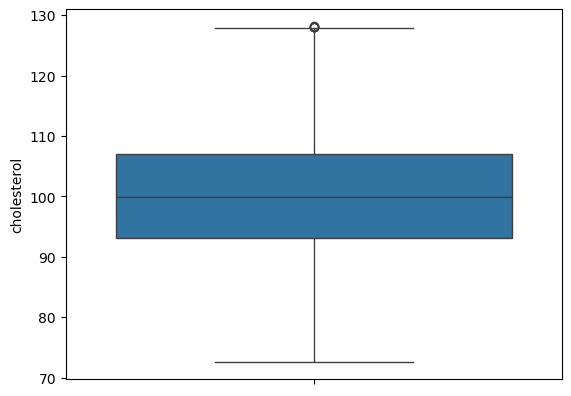

In [20]:
# Next let's visualise them
data_temp2 = data_cleaned.drop(columns=['ID', 'prognosis'])
for feature in data_temp2:
  sns.boxplot(data_temp2[feature])
  plt.show()

#### Correlation

In [21]:
#Correlation
data_temp2.corr()

,age,systolic_bp,diastolic_bp,cholesterol
age,1.000000,0.013811,-0.004043,-0.000652
systolic_bp,0.013811,1.000000,0.397844,0.392816
diastolic_bp,-0.004043,0.397844,1.000000,0.382441
cholesterol,-0.000652,0.392816,0.382441,1.000000


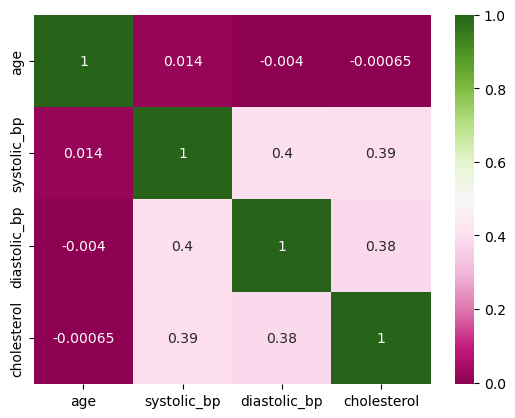

In [22]:
# Let's visualize the correlation
sns.heatmap(data_temp2.corr(), annot=True, cmap="PiYG")
plt.show()

##### Here we can understood the +ve correlation and -ve correlation between them

In classification algorithms the outputs are 0 and 1 as we know.

The prognosis column has to be encoded to make the true value 1 as Retinopathy and False value 0 as No_Retinopathy.

In [23]:
import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')

In [24]:
le = LabelEncoder()
le

LabelEncoder()

In [25]:
columns_to_be_label_encoded =['prognosis']

In [26]:
for i in columns_to_be_label_encoded:
    data_cleaned[i] = le.fit_transform(data_cleaned[i])

In [27]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5946 entries, 0 to 5999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            5946 non-null   int64  
 1   age           5946 non-null   float64
 2   systolic_bp   5946 non-null   float64
 3   diastolic_bp  5946 non-null   float64
 4   cholesterol   5946 non-null   float64
 5   prognosis     5946 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 325.2 KB


In [28]:
data_cleaned['prognosis'].value_counts()

prognosis
1    3040
0    2906
Name: count, dtype: int64

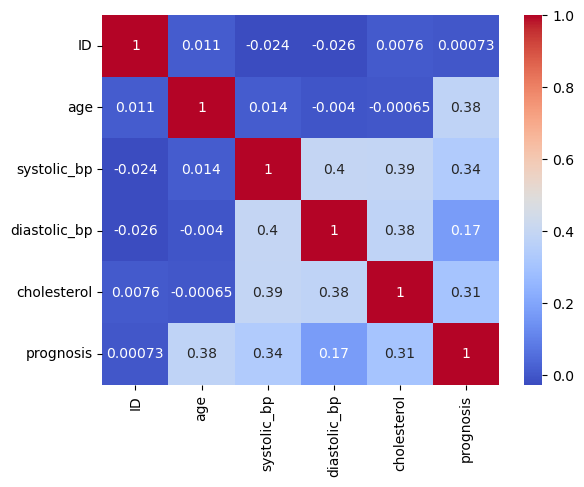

In [29]:
sns.heatmap(data_cleaned.corr(), annot = True, cmap="coolwarm")
plt.show()

In [30]:
data_cleaned.columns

Index(['ID', 'age', 'systolic_bp', 'diastolic_bp', 'cholesterol', 'prognosis'], dtype='object')

In [31]:
# before we perform scaling we remove column? ID
data_cleaned=data_cleaned.drop(columns=['ID'])

In [32]:
data_cleaned[0:11]

,age,systolic_bp,diastolic_bp,cholesterol,prognosis
0,77.196340,85.288742,80.021878,79.957109,1
1,63.529850,99.379736,84.852361,110.382411,1
2,69.003986,111.349455,109.850616,100.828246,1
3,82.638210,95.056128,79.666851,87.066303,1
4,78.346286,109.154591,90.713220,92.511770,1
5,52.181782,121.080264,110.488129,115.468279,1
6,68.722144,115.232290,92.730813,106.784960,1
7,58.716578,98.653683,94.172130,100.829654,1
8,59.121758,102.681371,96.991612,106.331045,1
9,63.624683,96.341053,80.919213,121.558605,1


In [33]:
# No 0's? Let's check again
data_cleaned.tail()

,age,systolic_bp,diastolic_bp,cholesterol,prognosis
5995,49.611850,94.857639,86.615671,107.643986,0
5996,63.099686,100.039527,93.515186,104.971404,1
5997,55.562243,98.421446,102.697875,120.875951,1
5998,63.468956,106.809289,88.060631,106.052213,1
5999,62.506825,96.900784,86.878033,108.625436,0


#### Scaling

In [34]:
from sklearn.model_selection import train_test_split

x = data_cleaned.drop(columns=['prognosis'])
y = data_cleaned['prognosis']

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [37]:
x_train_scaled.shape

(4756, 4)

In [38]:
x_test_scaled.shape

(1190, 4)

### Random Forest Classifier

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

import joblib
from scipy.stats import zscore

In [40]:
# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [41]:
# Predictions
y_pred = model.predict(x_test_scaled)

In [42]:
# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[443 161]
 [144 442]]

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.73      0.74       604
           1       0.73      0.75      0.74       586

    accuracy                           0.74      1190
   macro avg       0.74      0.74      0.74      1190
weighted avg       0.74      0.74      0.74      1190


Accuracy: 0.7436974789915967


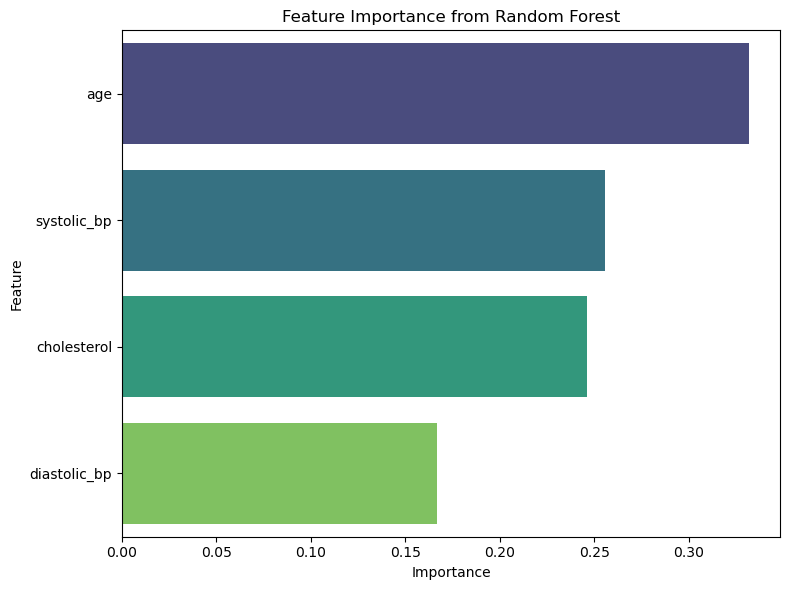

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances and feature names
importances = model.feature_importances_
features = x.columns

# Create a DataFrame for easy plotting
feat_importances = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_importances = feat_importances.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feat_importances, palette='viridis')
plt.title("Feature Importance from Random Forest")
plt.tight_layout()
plt.show()

In [44]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

Precision: 0.73
Recall: 0.75
F1 Score: 0.74


### Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize Logistic Regression model
log_reg_model = LogisticRegression()

# Train the model
log_reg_model.fit(x_train, y_train)

# Make predictions
y_pred_log_reg = log_reg_model.predict(x_test)

# Calculate accuracy
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print(f'Logistic Regression Accuracy: {accuracy_log_reg:.2f}')

Logistic Regression Accuracy: 0.75


### K - Nearest Neighbor Classifier

In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Initialize KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can try different values of k

# Train the model
knn_model.fit(x_train, y_train)

# Make predictions
y_pred_knn = knn_model.predict(x_test)

# Calculate accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'KNN Accuracy: {accuracy_knn:.2f}')

KNN Accuracy: 0.72


### XGBoost Classifier

In [47]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Initialize XGBoost model
xgb_model = xgb.XGBClassifier(eval_metric='mlogloss', use_label_encoder=False)

# Train the model
xgb_model.fit(x_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(x_test)

# Calculate accuracy
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f'XGBoost Accuracy: {accuracy_xgb:.2f}')

XGBoost Accuracy: 0.73


### Gradient Boosting Classifier

In [48]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize GradientBoosting model
gboost = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
gboost.fit(x_train_scaled,y_train)

# Make predictions
y_pred_gboost = gboost.predict(x_test_scaled)

# Calculate accuracy
accuracy_gboost = accuracy_score(y_test,y_pred_gboost)
print("GradientBoosting Accuracy : " ,accuracy_gboost)

GradientBoosting Accuracy :  0.746218487394958


In [49]:
# Create an empty dictionary to store results
model_results = {}

# 1. Logistic Regression
log_reg_model = LogisticRegression()
log_reg_model.fit(x_train, y_train)
y_pred_log_reg = log_reg_model.predict(x_test)

# Store results for Logistic Regression
model_results['Logistic Regression'] = {
    'Accuracy': accuracy_score(y_test, y_pred_log_reg),
    'Precision': precision_score(y_test, y_pred_log_reg),
    'Recall': recall_score(y_test, y_pred_log_reg),
    'F1 Score': f1_score(y_test, y_pred_log_reg),
    'Confusion Matrix': confusion_matrix(y_test, y_pred_log_reg)
}


# 2. K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train, y_train)
y_pred_knn = knn_model.predict(x_test)

# Store results for KNN
model_results['KNN'] = {
    'Accuracy': accuracy_score(y_test, y_pred_knn),
    'Precision': precision_score(y_test, y_pred_knn),
    'Recall': recall_score(y_test, y_pred_knn),
    'F1 Score': f1_score(y_test, y_pred_knn),
    'Confusion Matrix': confusion_matrix(y_test, y_pred_knn)
}

# 3. XGBoost
xgb_model = xgb.XGBClassifier(eval_metric='mlogloss')  # Remove the `use_label_encoder` parameter
xgb_model.fit(x_train, y_train)
y_pred_xgb = xgb_model.predict(x_test)

# Store results for XGBoost
model_results['XGBoost'] = {
    'Accuracy': accuracy_score(y_test, y_pred_xgb),
    'Precision': precision_score(y_test, y_pred_xgb),
    'Recall': recall_score(y_test, y_pred_xgb),
    'F1 Score': f1_score(y_test, y_pred_xgb),
    'Confusion Matrix': confusion_matrix(y_test, y_pred_xgb)
}


# 4. Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)

# Store results for Random Forest
model_results['Random Forest'] = {
    'Accuracy': accuracy_score(y_test, y_pred_rf),
    'Precision': precision_score(y_test, y_pred_rf),
    'Recall': recall_score(y_test, y_pred_rf),
    'F1 Score': f1_score(y_test, y_pred_rf),
    'Confusion Matrix': confusion_matrix(y_test, y_pred_rf)
}

# 5. Gradient Boosting
gboost = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gboost.fit(x_train_scaled,y_train)
y_pred_gboost = gboost.predict(x_test_scaled)
accuracy_gboost = accuracy_score(y_test,y_pred_gboost)
precision_gboost = precision_score(y_test,y_pred_gboost)
recall_gboost = recall_score(y_test,y_pred_gboost)
f1_gboost = f1_score(y_test,y_pred_gboost)

# Store results for Gradient Boosting
model_results['Gradient Boosting'] = {
    'Accuracy': accuracy_score(y_test, y_pred_gboost),
    'Precision': precision_score(y_test, y_pred_gboost),
    'Recall': recall_score(y_test, y_pred_gboost),
    'F1 Score': f1_score(y_test, y_pred_gboost),
    'Confusion Matrix': confusion_matrix(y_test, y_pred_gboost)
}

In [50]:
# Convert the results dictionary to a DataFrame
comparison_df = pd.DataFrame(model_results).T

# Display the comparison table
print(comparison_df)

                     Accuracy Precision    Recall  F1 Score  \
Logistic Regression   0.75042  0.745331  0.749147  0.747234   
KNN                  0.715966  0.700647  0.738908  0.719269   
XGBoost              0.731092  0.709119  0.769625  0.738134   
Random Forest        0.743697  0.733002  0.754266  0.743482   
Gradient Boosting    0.746218  0.732787  0.762799  0.747492   

                             Confusion Matrix  
Logistic Regression  [[454, 150], [147, 439]]  
KNN                  [[419, 185], [153, 433]]  
XGBoost              [[419, 185], [135, 451]]  
Random Forest        [[443, 161], [144, 442]]  
Gradient Boosting    [[441, 163], [139, 447]]  


In [51]:
# Evaluate Logistic Regression model
y_pred_log_reg = log_reg_model.predict(x_test)

# Metrics
print("Logistic Regression Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_log_reg)}")
print(f"Precision: {precision_score(y_test, y_pred_log_reg)}")
print(f"Recall: {recall_score(y_test, y_pred_log_reg)}")
print(f"F1 Score: {f1_score(y_test, y_pred_log_reg)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_log_reg)}")

Logistic Regression Metrics:
Accuracy: 0.7504201680672269
Precision: 0.7453310696095077
Recall: 0.7491467576791809
F1 Score: 0.7472340425531915
Confusion Matrix:
[[454 150]
 [147 439]]


### Deployment 

In [57]:
# Save the model
import joblib
joblib.dump(model, 'logreg_model.pkl')   # Logistic Regression

['logreg_model.pkl']

In [58]:
logreg_from_joblib = joblib.load('logreg_model.pkl') 